In [1]:
import numpy as np
import pandas as pd

# **Exploring Dataset**

In [2]:
data = pd.read_csv("F:\\TY\\Sem 2\\NLP\\PBL\\Project\\Data\\kaggle_movie_train.csv")
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [3]:
data.shape

(22579, 3)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\shela\AppData\Local\Temp\ipykernel_17608\2171847008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=data,palette='Set2')


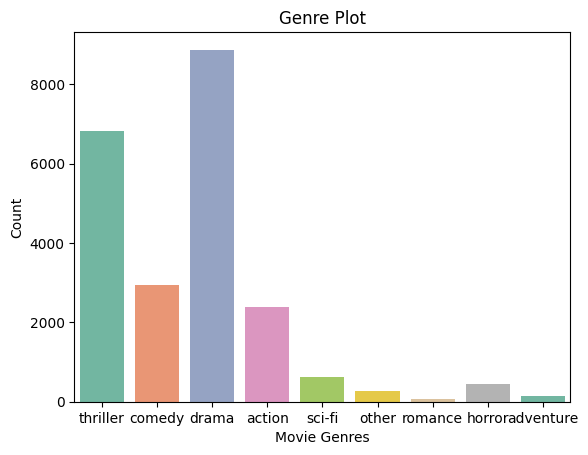

In [5]:
sns.countplot(x='genre', data=data,palette='Set2')
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [6]:
movie_genre = list(data['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [7]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
data['genre'] = data['genre'].map(genre_mapper)
data.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [8]:
data.isnull().count()

id       22579
text     22579
genre    22579
dtype: int64

In [9]:
data.drop('id', axis=1, inplace=True)
data.columns

Index(['text', 'genre'], dtype='object')

In [10]:
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",3
2,"up Come, I have a surprise.... She takes him ...",4
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",4


In [11]:
import nltk
import re
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data.shape[0]

22579

In [13]:
corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):

    dialogue = re.sub(pattern = '^a-zA-Z', repl = ' ', string = data['text'][i])

    dialogue = dialogue.lower()

    words = word_tokenize(dialogue)

    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

    words = [ps.stem(word) for word in dialog_words]

    dialog = ' '.join(words)

    corpus.append(dialog)

In [14]:
corpus[0:10]

["eadi dead , mayb even wish . int . 2nd floor hallway three night orderli lead liza door . orderli . white guy 30 . open door step ... room three 's white guy mid 30 . look . wild . straight jacket . jerri . liza 's reach end rope . shake head . int . decrepit hospit room night ball . fetal . realli . head press cement , tri sing . jerri blue moon ... blue moon ... int . 2nd floor hallway three night liza stand , lean rail wall . orderli n't sure 's go , know 's bad . orderli okay ? liza start hall orderli follow . orderli got new patient last week . want see ? liza wave . 's hopeless . stop chicken wire window end hall , look . light 's break jerri 's somewher . orderli look , got ta get back work .",
 ", summa cum laud . 'm launch brand new magazin call expos ! homag miss juli conroy xenia , ohio . juli grin . juli know find excel editor chief . ted yellow page ? juli let finger walk . suddenli music chang . peopl . ted grin . ted 're play song . extend hand dare ask danc ? juli tak

In [15]:
len(corpus)

22579

In [16]:
data['genre'].unique()

array([8, 3, 4, 1, 7, 0, 6, 5, 2], dtype=int64)

In [17]:
drama_words = []
for i in list(data[data['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(data[data['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(data[data['genre']==3].index):
  comedy_words.append(corpus[i])

In [18]:
drama = ''
action = ''
comedy = ''
for i in range(0, len(drama_words)):
  drama += drama_words[i]
for i in range(0, len(action_words)):
  action += action_words[i]
for i in range(0, len(comedy_words)):
  comedy += comedy_words[i]

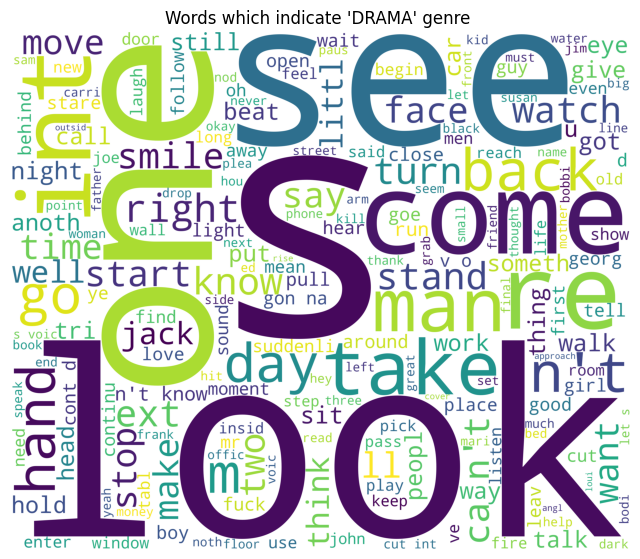

In [19]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

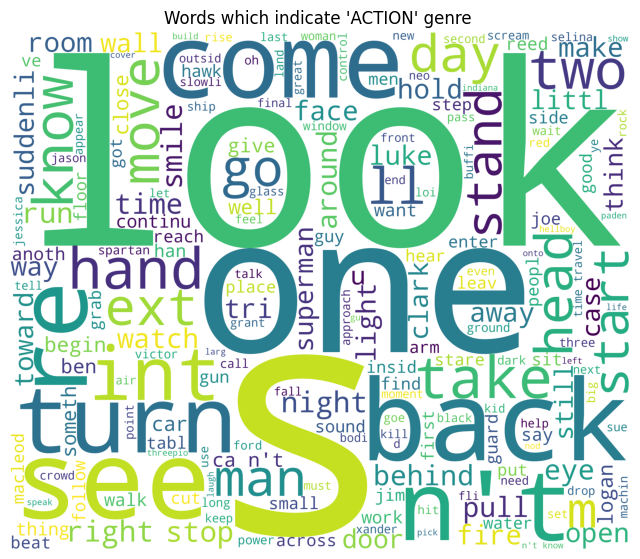

In [20]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

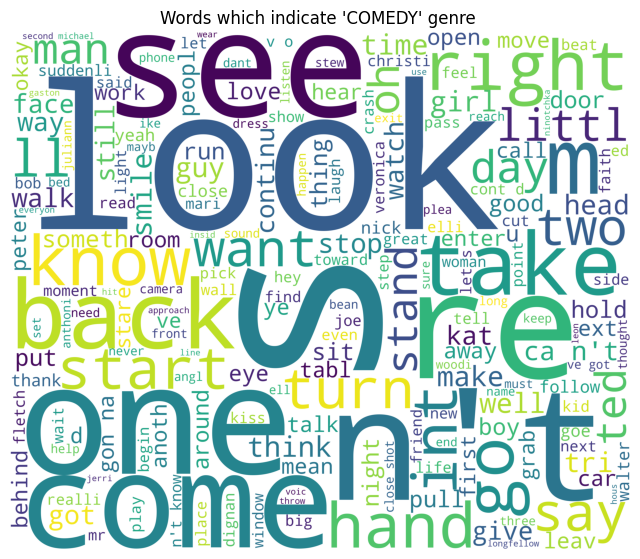

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))

In [23]:
X1 = cv.fit_transform(corpus)

In [24]:
y = data['genre'].values

# **Model Building**

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

# Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()
classifier1.fit(X1_train, y_train)

MultinomialNB()

In [28]:
y_pred1 = classifier1.predict(X1_test)

In [29]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy score is: {round(score1*100,2)}%")

Accuracy score is: 89.13%


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[  61,    2,    0,    0,    1,    2,    0,    0,    0],
       [   0,  447,    0,    9,    6,    1,    0,    0,   13],
       [   0,    2,   41,    0,    2,    0,    0,    0,    0],
       [   0,    7,    0,  516,   17,    2,    0,    4,   13],
       [   5,   43,    1,   35, 1598,   22,    1,   11,  111],
       [   0,    1,    0,    1,    5,   73,    0,    0,    2],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  113,    7],
       [   0,   14,    0,   21,   80,   11,    0,   26, 1166]],
      dtype=int64)

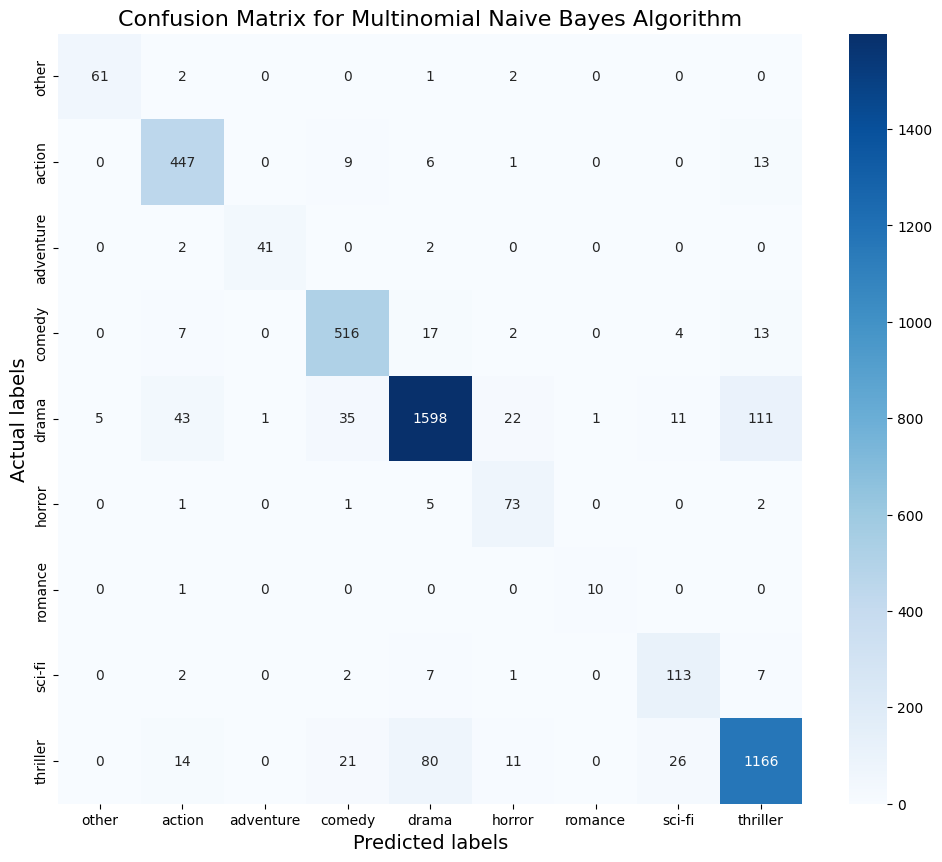

In [31]:
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']

plt.figure(figsize=(12, 10))
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('Actual labels', fontsize=14)
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm', fontsize=16)
plt.show()

In [34]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X1_train, y_train)
  temp_y_pred = temp_classifier.predict(X1_test)
  score = accuracy_score(y_test, temp_y_pred)
  print(f"Accuracy score for alpha={round(i,1)} is: {round(score*100,2)}%")
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print(f'The best accuracy is {round(best_accuracy*100, 2)}% with alpha value as {round(alpha_val,1)}')

Accuracy score for alpha=0.1 is: 90.94%
Accuracy score for alpha=0.2 is: 90.54%
Accuracy score for alpha=0.3 is: 90.26%
Accuracy score for alpha=0.4 is: 89.99%
Accuracy score for alpha=0.5 is: 89.7%
Accuracy score for alpha=0.6 is: 89.57%
Accuracy score for alpha=0.7 is: 89.5%
Accuracy score for alpha=0.8 is: 89.44%
Accuracy score for alpha=0.9 is: 89.39%
Accuracy score for alpha=1.0 is: 89.13%
--------------------------------------------
The best accuracy is 90.94% with alpha value as 0.1


In [36]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X1_train, y_train)

MultinomialNB(alpha=0.1)

# **Prediction**

In [37]:
def input_processor(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)
  return final_script

def genre_prediction(sample_script):
  temp = cv.transform([sample_script]).toarray()
  return classifier.predict(temp)[0]

In [38]:
test = pd.read_csv("F:\\TY\\Sem 2\\NLP\\PBL\\Project\\Data\\kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [39]:
test.shape

(5589, 2)

In [40]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [41]:
from random import randint

row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print(f'Script:\n{sample_script}')
predicted_genre = genre_prediction(sample_script)
print(f'\nPrediction: {list(genre_mapper.keys())[predicted_genre]}')

Script:
at the steps of the castle. the Burgomeister pounds on the front door. CUT BACK TO 96 128 ELIZABETH'S BEDROOM 128 Elizabeth lies in bed, illuminated be the flames from her fireplace. There is the soft SOUND of CURTAINS FLAPPING. The French doors have been opened the silk curtains flapping from a breeze outside. CUT BACK TO 129 EXT. CASTLE 129 The Burgomeister pounds louder and louder on the front door. Finally the door opens and Freddy appears in his robe. he looks at the angry mob. BURGOMEISTER Frederick Frankenstein? FREDDY You have the wrong house. BURGOMEISTER And who might you be? FREDDY Dr. Frederick Fronkonsteen. BURGOMEISTER The grandson of Victor 'Fronkonsteen'? FREDDY No! BURGOMEISTER What was your grandfather's name? FREDDY Victor Frankenstein. Pause, as the Burgomeister tries to fit the pieces together. CUT BACK TO 130 ELIZABETH'S BEDROOM 130 Elizabeth has a contented smile on her face. Her eyes are closed. A LARGE SHADOW grows against the wall behind her. Cont. 97 

In [42]:
movie_name = 'The Hangover (2009)'
plot_summary = "Three buddies wake up from a bachelor party in Las Vegas, with no memory of the previous night and the bachelor missing. They make their way around the city in order to find their friend before his wedding."
actual_genre = ['Comedy']
processed_script = input_processor(plot_summary)
predicted_genre = genre_prediction(processed_script)
print(f'Movie: {movie_name}\nPredicted genres: {list(genre_mapper.keys())[predicted_genre]}\nActual genres: {actual_genre}')

Movie: The Hangover (2009)
Predicted genres: comedy
Actual genres: ['Comedy']


# **Downloading Model**

In [45]:
import joblib

model_file_path = r'F:\TY\Sem 2\NLP\PBL\Project\Model\model.pkl'

model_data = {
    'classifier': classifier,
    'count_vectorizer': cv,
}

joblib.dump(model_data, model_file_path)

['F:\\TY\\Sem 2\\NLP\\PBL\\Project\\Model\\model.pkl']

In [46]:
model = joblib.load('model')
model.keys()

dict_keys(['classifier', 'count_vectorizer'])